In [57]:
# importing python libraries, that gives extra functionalities to to import data, clean the data, format the data, build and evaluate the XGBoost model.

import pandas as pd # for loading and manipulating data and for One-Hot Encoding
import numpy as np # calculating the mean and standard deviation
import matplotlib.pyplot as plt # for visualisation
import seaborn as sns  # for visualisation
import plotly.express as px  # for visualisation
from sklearn import metrics

import xgboost as xgb # import XGBoost 
from sklearn.model_selection import train_test_split # for spliting data into training and testing sets
from sklearn.model_selection import GridSearchCV # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.preprocessing import scale # for scaling and centring data
from sklearn.decomposition import PCA # to perform PCA for plotting the data
from sklearn.svm import SVC  # for making support vector machine for classification
from sklearn.utils import resample # for downsampling the dataset

%matplotlib inline

In [2]:
# importing training data and looking at the data
train = pd.read_csv('train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
# importing test data and looking at the data
test = pd.read_csv('test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [4]:
# checking the type of data in each column

train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train['Cabin'].unique

<bound method Series.unique of 0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object>

In [7]:
# dropping columns not usefull

train.drop(['Cabin','Name', 'PassengerId'], axis=1, inplace=True)

In [8]:
test.drop(['Cabin','Name'], axis=1, inplace=True)

In [9]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [11]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [12]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0],inplace = True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0],inplace = True)
train['Destination'].fillna(train['Destination'].mode()[0],inplace = True)
train['VIP'].fillna(train['VIP'].mode()[0],inplace = True)

train['Age'].fillna(train['Age'].median(), inplace = True)
train['RoomService'].fillna(train['RoomService'].median(), inplace = True)
train['FoodCourt'].fillna(train['FoodCourt'].median(), inplace = True)
train['ShoppingMall'].fillna(train['ShoppingMall'].median(), inplace = True)
train['Spa'].fillna(train['Spa'].median(), inplace = True)
train['VRDeck'].fillna(train['VRDeck'].median(), inplace = True)

In [13]:
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0],inplace = True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0],inplace = True)
test['Destination'].fillna(test['Destination'].mode()[0],inplace = True)
test['VIP'].fillna(test['VIP'].mode()[0],inplace = True)

test['Age'].fillna(test['Age'].median(), inplace = True)
test['RoomService'].fillna(test['RoomService'].median(), inplace = True)
test['FoodCourt'].fillna(test['FoodCourt'].median(), inplace = True)
test['ShoppingMall'].fillna(test['ShoppingMall'].median(), inplace = True)
test['Spa'].fillna(test['Spa'].median(), inplace = True)
test['VRDeck'].fillna(test['VRDeck'].median(), inplace = True)

In [14]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [15]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

<AxesSubplot:ylabel='Transported'>

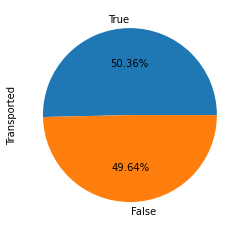

In [16]:
train['Transported'].value_counts().plot.pie(autopct='%0.2f%%')

<AxesSubplot:xlabel='count', ylabel='HomePlanet'>

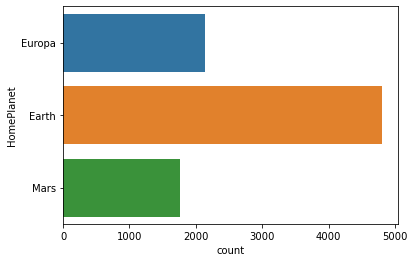

In [17]:
sns.countplot(y=train.HomePlanet)

<AxesSubplot:xlabel='count', ylabel='CryoSleep'>

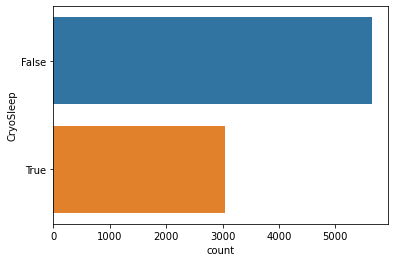

In [18]:
sns.countplot(y=train.CryoSleep)

<AxesSubplot:xlabel='count', ylabel='Destination'>

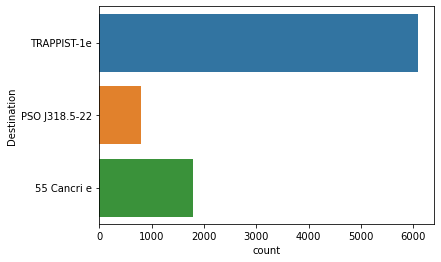

In [19]:
sns.countplot(y=train.Destination)

<AxesSubplot:xlabel='count', ylabel='VIP'>

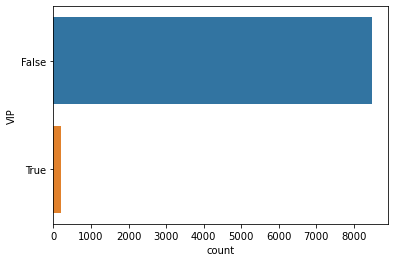

In [20]:
sns.countplot(y=train.VIP)

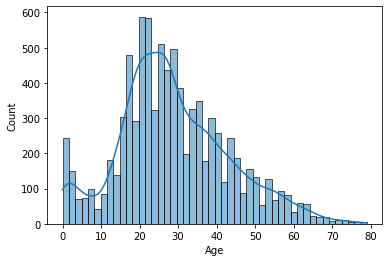

In [21]:
sns.histplot(x=train.Age,kde=True)
plt.show()

In [22]:
# checking the correlation of the features
train.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
CryoSleep,1.000000,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Age,-0.071323,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,-0.078281,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,-0.244089,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,-0.205928,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,-0.207798,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,-0.198307,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,-0.192721,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874
Transported,0.460132,-0.074233,-0.037261,-0.241124,0.045583,0.009391,-0.218545,-0.204874,1.000000


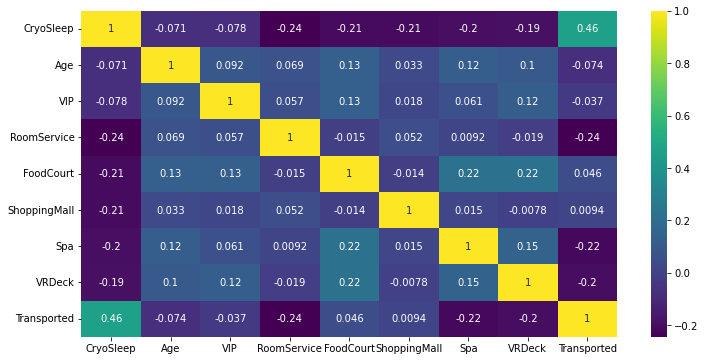

In [23]:
# visualizing the correlation of the features
plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True, cmap='viridis')
plt.show()

In [24]:
# spliting the data into Dependent and independent variables

X = train.drop('Transported', axis=1)
y = train['Transported']

In [25]:
# Format data with one-hot encoding
X_encoded = pd.get_dummies(X, columns=['HomePlanet',
                                               'CryoSleep',
                                               'Destination',
                                               'VIP',
])

X_encoded.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0


In [26]:
X_encoded.shape

(8693, 16)

In [27]:
# spliting the encoded dataset

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42, test_size=0.3, stratify=y)

# Support Vector Machine (SVM)

In [28]:
# scalling the dataset

X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [29]:
X_train_scaled

array([[-0.04301796, -0.33413574, -0.27865786, ...,  0.65247708,
         0.15457573, -0.15457573],
       [ 0.23627175, -0.33413574,  1.0601652 , ..., -1.53262089,
         0.15457573, -0.15457573],
       [ 0.16644933, -0.33413574,  0.9538798 , ...,  0.65247708,
         0.15457573, -0.15457573],
       ...,
       [-0.04301796, -0.33413574, -0.27865786, ...,  0.65247708,
         0.15457573, -0.15457573],
       [ 0.44573904, -0.33413574, -0.27865786, ..., -1.53262089,
         0.15457573, -0.15457573],
       [ 0.02680447, -0.33413574, -0.27865786, ..., -1.53262089,
        -6.46932088,  6.46932088]])

In [30]:
X_train_scaled.shape

(6085, 16)

In [31]:
X_test_scaled.shape

(2608, 16)

In [32]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)
clf_svm.score(X_train_scaled, y_train)

0.790304026294166

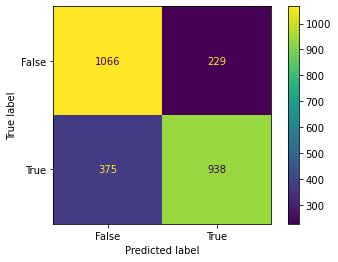

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_svm,
                                     ,
                                     y_test,
                                     )

plt.show()

In [34]:
# param_grid = [
#     {'C':[0.5, 1, 10, 100],
#      'gamma': ['scale', 1, 0.1, 0.001, 0.0001],
#      'kernel':['rbf']},
    
# ]

# optimal_params = GridSearchCV(
#     SVC(),
#     param_grid,
#     cv=5,
#     scoring='accuracy',
#     verbose=0
# )

# optimal_params.fit(X_train_scaled, y_train)
# print(optimal_params.best_params_)

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [35]:
clf_svm = SVC(random_state=42, C=10, gamma=0.1)
clf_svm.fit(X_train_scaled, y_train)
clf_svm.score(X_train_scaled, y_train)

0.8024650780608052

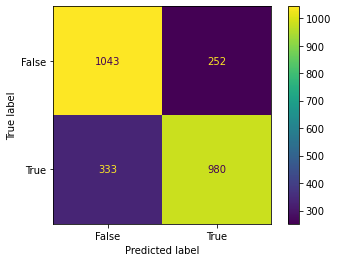

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_svm,
                                     X_test_scaled,
                                     y_test)

plt.show()

In [42]:
pred = clf_svm.predict(X_test_scaled)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, target_names=["0","1"]))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78      1295
           1       0.80      0.75      0.77      1313

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [44]:
clf_svm.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.1,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [45]:
import pickle

In [46]:
pickle.dump(clf_svm,open('svmmodel.pkl','wb'))

In [47]:
pickled_model=pickle.load(open('svmmodel.pkl','rb'))

In [49]:
# pickled_model.predict(X_test_scaled[0].reshape(1,-1))

array([False])

In [53]:
predictions = pickled_model.predict(X_test_scaled)

In [54]:
predictions[0:15]

array([False, False,  True,  True,  True,  True, False,  True, False,
        True, False, False,  True,  True, False])

# XGBOOST

In [55]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6085, 16) (2608, 16) (6085,) (2608,)


In [58]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train,
            y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

C:\Users\User2\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\User2\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=None, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_xgb,
                                      X_test_scaled,
                                      y_test,)
                      

XGBoostError: [16:01:14] c:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1\xgboost\xgboost-ci-windows\src\c_api\c_api_utils.h:167: Invalid missing value: null

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf_svm,
                                     X_test_scaled,
                                     y_test)